# 1. BINARY CLASSIFICATION TEST

In the first section of this jupyter notebook, we test our class module of logistic regression binary classifier by investigating the decision boundary of a fitted model using a mesh plot

**Add the directory of the m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import neccessary packages and modules**

In [2]:
import numpy as np
import pandas as pd
np.random.seed(0)
from m_learn.logistic_regression import binary_classifier
from m_learn.utility.data_preprocessing import get_xy_data, mesh_data, train_test_feature_scaler
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1.1 Create 2 clusters/classes of 2D data

**Create x values of the 2 clusters**

In [3]:
# std of the random distribution
sigma = 2.5
# size of each class
cls_size = 500
# create x data of first class
x11 = np.random.normal(20, sigma, cls_size)
x21 = np.random.normal(20, sigma, cls_size)
# create x data of second class
x12 = np.random.normal(45, sigma, cls_size)
x22 = np.random.normal(30, sigma, cls_size)

**Append the feature 1(x1) & feature 2 (x2) values of the 2 clusters**

In [4]:
x1 = np.append(x11,x12)
x2 = np.append(x21,x22)

**Create the labels of the 2 clusters**

In [5]:
y = [0 for i in range(cls_size)] + [1 for i in range(cls_size)]

**Store the xy data in a pandas dataframe**

In [6]:
data = pd.DataFrame({"x1": x1, "x2": x2, "y":y})

In [7]:
data.head(5)

,x1,x2,y
0,24.410131,20.956831,0
1,21.000393,19.914394,0
2,22.446845,22.740867,0
3,25.602233,19.414460,0
4,24.668895,19.131373,0


In [8]:
data.tail(5)

,x1,x2,y
995,48.296378,30.244377,1
996,44.401759,33.503809,1
997,44.383016,30.396085,1
998,42.301642,27.145246,1
999,44.714436,26.722574,1


## 1.2 Scatter plot of different classes

**Extract the data of the 2 classes**

In [9]:
class1 = data[data["y"] == 0]
class2 = data[data["y"] == 1]

**Scatter plot of the 2 classes**

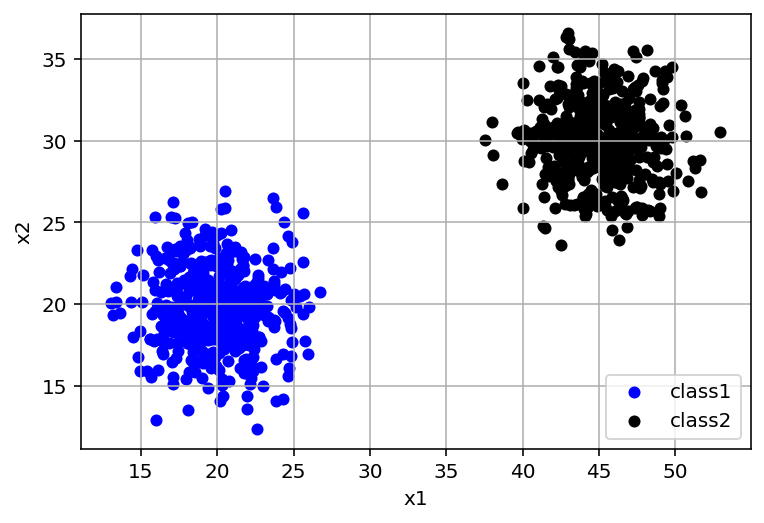

In [10]:
plt.scatter(class1["x1"], class1["x2"], c = 'b', linewidths=0.01, label = 'class1')
plt.scatter(class2["x1"], class2["x2"], c = 'k', linewidths=0.01, label = 'class2')
plt.legend(loc='lower right')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

## 1.3 Train classifier using the data

**Create the classifier object**

In [11]:
model = binary_classifier(track_logistic_cost=True) 

**Model Parameters**

In [12]:
# step size/learning rate of the model
step_size = 1e-2
# max iterations
maximum_iterations = 100001

**Extract feature matrix and labels**

In [13]:
# features of the model
features = ['x1', 'x2']
# features of the model
output = 'y'
# extract xy data
(X, y) = get_xy_data(data, features, output)

**Fit the model**

In [14]:
model.fit(X, y, step_size, maximum_iterations = maximum_iterations, verbose = True)

iteration   2000: logistic cost = 0.14922237
iteration   4000: logistic cost = 0.13319060
iteration   6000: logistic cost = 0.11933557
iteration   8000: logistic cost = 0.10736749
iteration  10000: logistic cost = 0.09703588
iteration  12000: logistic cost = 0.08810830
iteration  14000: logistic cost = 0.08037685
iteration  16000: logistic cost = 0.07366028
iteration  18000: logistic cost = 0.06780340
iteration  20000: logistic cost = 0.06267492
iteration  22000: logistic cost = 0.05816456
iteration  24000: logistic cost = 0.05418010
iteration  26000: logistic cost = 0.05064454
iteration  28000: logistic cost = 0.04749356
iteration  30000: logistic cost = 0.04467339
iteration  32000: logistic cost = 0.04213894
iteration  34000: logistic cost = 0.03985232
iteration  36000: logistic cost = 0.03778154
iteration  38000: logistic cost = 0.03589955
iteration  40000: logistic cost = 0.03418332
iteration  42000: logistic cost = 0.03261322
iteration  44000: logistic cost = 0.03117242
iteration 

## 1.4 Visualize the decision boundary using mesh plot

**Create mesh points**

In [15]:
# step in mesh plot
mesh_step = 0.5
# extract the xx & yy matrices and the flattened mesh points
xx, yy, mesh_points = mesh_data(data, features, mesh_step, boudary_extension=5)
# create mesh points
mesh_points = get_xy_data(mesh_points, features)

**Compute predictions**

In [16]:
# compute predictions 
predictions = model.predict(mesh_points)
# reshape predictions so that it fits the meshplot
predictions = predictions.reshape(xx.shape)

**Mesh plot**

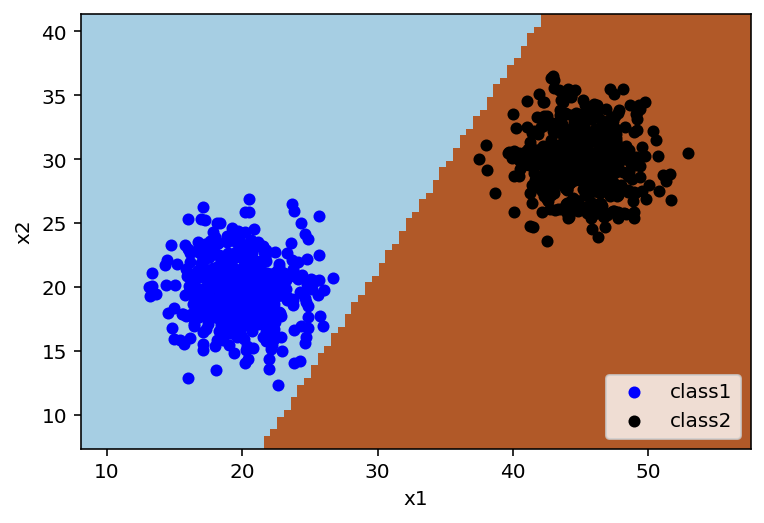

In [17]:
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(class1["x1"], class1["x2"], c = 'b', linewidths=0.01, label = 'class1')
plt.scatter(class2["x1"], class2["x2"], c = 'k', linewidths=0.01, label = 'class2')
plt.legend(loc='lower right')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

**Training accuracy of the model**

In [18]:
print("Model accuracy:",model.accuracy(X, y))

Model accuracy: 1.0


# 2. BINARY CLASSIFICATION ANALYSIS

In the second section of this jupyter notebook, we will fit a logistic regression classifier to classify for breast cancer diagnosis.

## 2.1 Load and preprocess data

**Load cancer diagnosis data**

In [19]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()

**Features & output of the model**

In [20]:
features = cancer_data.feature_names.tolist()
output = 'labels'

**Store the data in a pandas dataframe**

In [21]:
data = pd.DataFrame(cancer_data.data, columns=features)
data[output] = cancer_data.target
data = data.sample(frac=1, random_state=0).reset_index(drop=True)

In [22]:
data.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.081720,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
1,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.020680,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1
2,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.026520,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1
3,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.013740,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
5,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,...,23.03,79.15,478.6,0.14830,0.15740,0.16240,0.08542,0.3060,0.06783,1
6,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.029780,0.1203,0.06659,...,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1
7,11.700,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.011480,0.1936,0.06128,...,26.55,80.92,483.1,0.12230,0.10870,0.07915,0.05741,0.3487,0.06958,1
8,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,...,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938,1
9,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.020370,0.1633,0.07005,...,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488,1


**Train test split the data**

In [23]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size  = 0.25, random_state = 0)

**Scale the train and test set**

In [24]:
# import the minmax scaler module from scikit learn
from sklearn.preprocessing import MinMaxScaler
# create a scalar object that scales data into a range of 0 to 1
scaler = MinMaxScaler((0,1))
# scale the train and test set using the specialized scaling function we created earlier
train_data, test_data = train_test_feature_scaler(scaler, train_data, test_data, features)

#### Extract the feature matrix and labels of training and test set

In [25]:
(X_train, y_train) = get_xy_data(train_data,features=features,output=output)
(X_test, y_test) = get_xy_data(test_data,features=features,output=output)

## 2.2 Train Binary Classifier

#### Model parameters

In [26]:
step_size = 1e-3
maximum_iterations = 1500000

**Create an object of logistic regression model**

In [27]:
model = binary_classifier(track_logistic_cost=True)

**Train the model using the train set**

In [28]:
model.fit(X_train, y_train, step_size,\
          maximum_iterations = maximum_iterations, verbose = True)

iteration   30000: logistic cost = 0.34940146
iteration   60000: logistic cost = 0.26544910
iteration   90000: logistic cost = 0.22559895
iteration  120000: logistic cost = 0.20128274
iteration  150000: logistic cost = 0.18440241
iteration  180000: logistic cost = 0.17173967
iteration  210000: logistic cost = 0.16174299
iteration  240000: logistic cost = 0.15356322
iteration  270000: logistic cost = 0.14669163
iteration  300000: logistic cost = 0.14080207
iteration  330000: logistic cost = 0.13567411
iteration  360000: logistic cost = 0.13115235
iteration  390000: logistic cost = 0.12712340
iteration  420000: logistic cost = 0.12350214
iteration  450000: logistic cost = 0.12022311
iteration  480000: logistic cost = 0.11723497
iteration  510000: logistic cost = 0.11449669
iteration  540000: logistic cost = 0.11197506
iteration  570000: logistic cost = 0.10964278
iteration  600000: logistic cost = 0.10747718
iteration  630000: logistic cost = 0.10545924
iteration  660000: logistic cost =

#### Accuracy of the Model

In [29]:
accuracy = model.accuracy(X_test, y_test)
print("Accuracy of the model: ", accuracy)

Accuracy of the model:  0.972027972027972


## 2.3 Plot of Cost vs Iterations

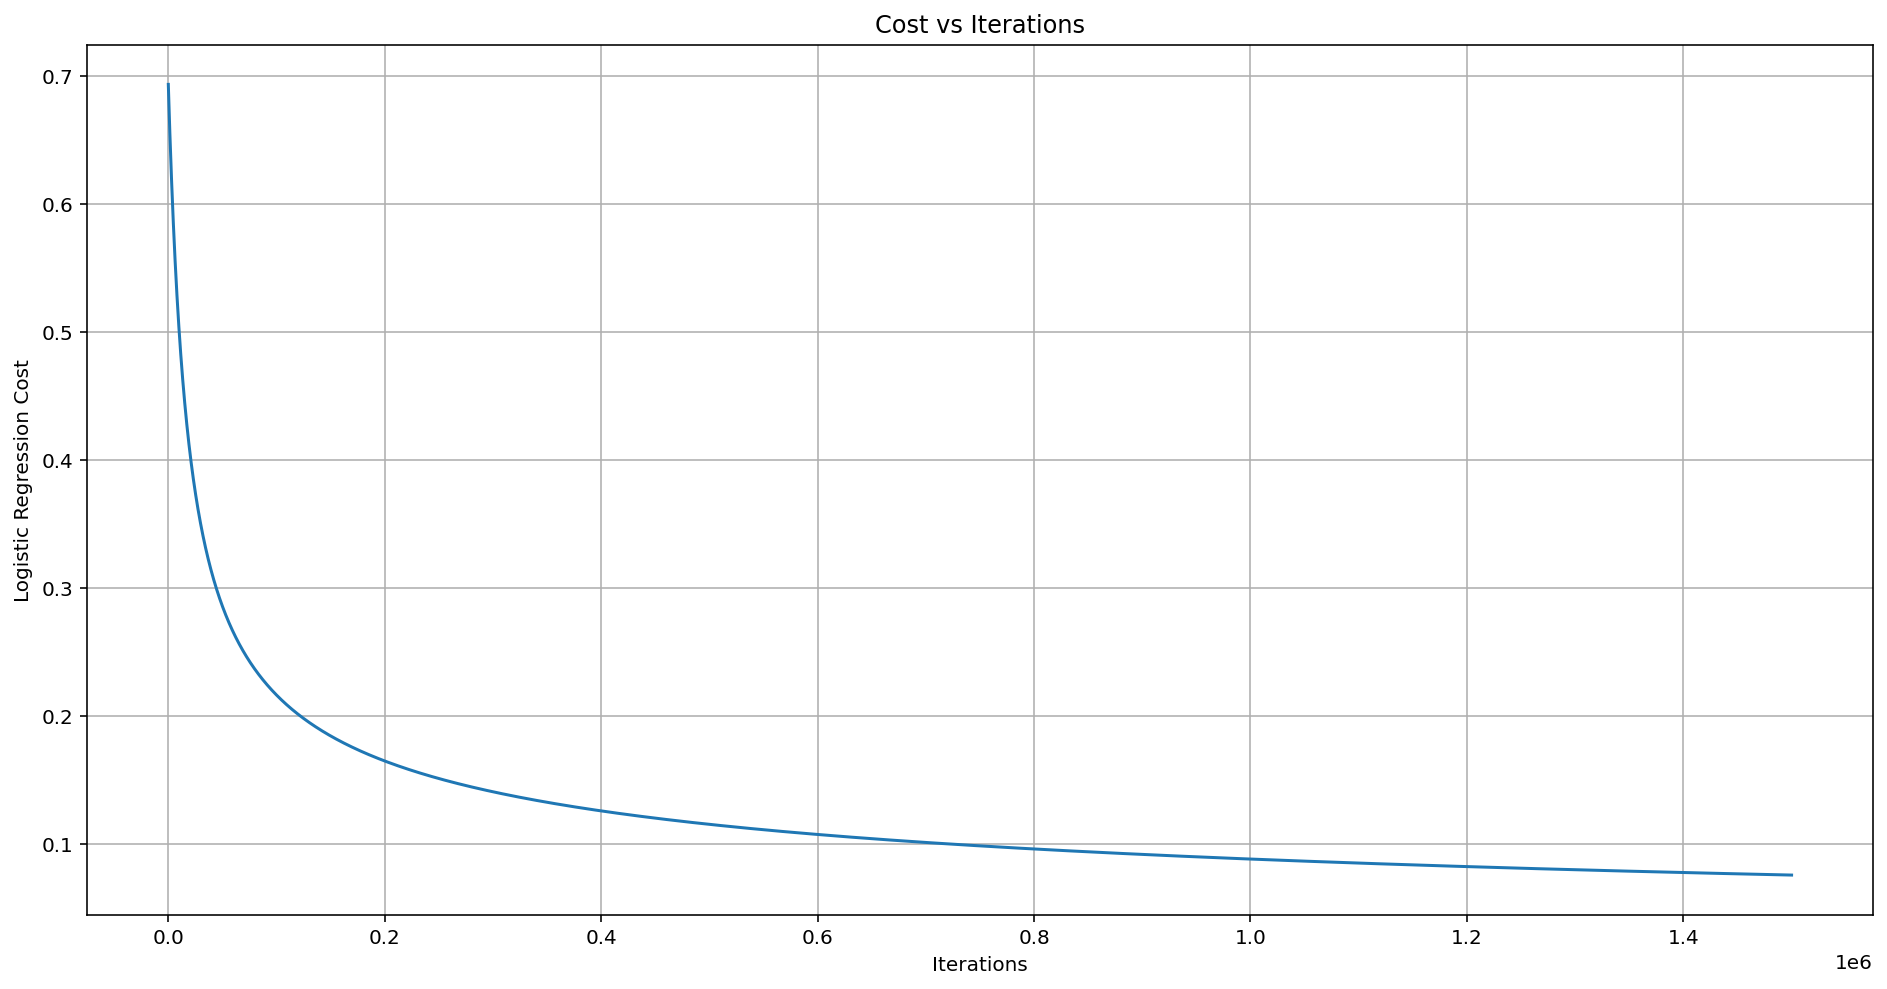

In [30]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
plt.plot(model.log_of_logistic_cost)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Logistic Regression Cost")
plt.grid()